**Class:** C5.4 Networks

**From:** Miguel Torres Costa

**To:** Mr Michael Coughlan

# All imports

In [1]:
import numpy as np
import networkx as nx
import math
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

# Utils

In [2]:
def draw(G,**kwargs):
    print("Number of nodes: " + str(len(G.nodes())))
    if len(G)<40:
        nx.draw_spring(G,
                       node_size=400,
                       with_labels=True)
    else:
        nx.draw_spring(G,
                       node_size=.5,
                       with_labels=False)       

In [3]:
def create_undirected_graph(edges):
    G=nx.Graph()
    G.add_edges_from(edges)
    return G

In [4]:
def create_directed_graph(edges):
    DG=nx.DiGraph()
    DG.add_edges_from(edges)
    return DG

In [5]:
def load_graph_from_tsv(file):
    f = open("datasets/" + str(file),"r")
    text = f.readlines()
    clean = lambda x:x.strip("\n").split(" ")
    node_pairs = list(map(clean,text[2:]))
    node_pairs = [(int(x[0]),int(x[1])) for x in node_pairs]
    node_pairs[:4]
    G = nx.Graph()
    G.add_edges_from(node_pairs)
    return G

In [6]:
def size_of_largest_component(G):
    return nx.number_of_nodes(max(nx.connected_component_subgraphs(G), key=len))

def average_degree(G):
    degrees = G.degree() # Creates a DegreeView
    degrees = list(map(lambda x:x[1],degrees)) # Creates list of degrees
    return np.mean(degrees)

# (Q2) - Erdos-Renyi
**(a)** Ex.V.1 : Reproduce numerically the results of Figure (14).

In [7]:
def create_erdos_renyi_relations(n_values,p_values):
    percentages = []
    degrees = []
    for n,p in itertools.product(n_values,p_values):
        G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
        percentages.append(size_of_largest_component(G)/nx.number_of_nodes(G))
        degrees.append(average_degree(G))
    return percentages,degrees

In [8]:
# n_values = list( map(lambda x:int(x), np.logspace(1,7,7, base=2)))
n_values = [200]
p_values = np.logspace(-7,-1,20,base=2)
percentages,degrees = create_erdos_renyi_relations(n_values=n_values,
                                                   p_values=p_values)

The plots below look nothing like the values expected :/

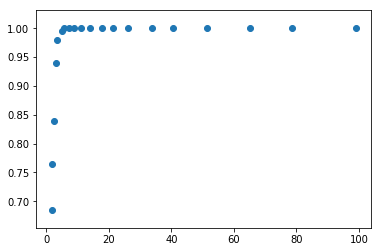

In [9]:
plt.scatter(degrees,percentages)

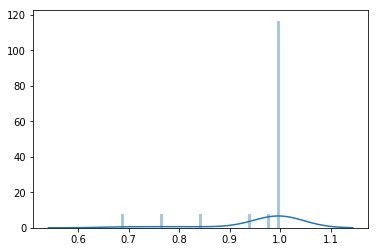

In [10]:
sns.distplot(percentages)

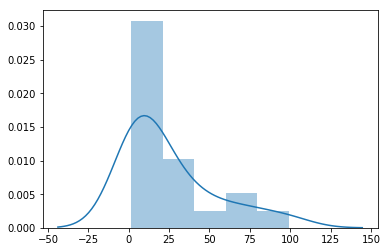

In [11]:
sns.distplot(degrees)

**(b)** Calculate the global clustering coefficient C of an ER graph (in expectation over the ensemble), and verify
your prediction numerically.

The global clustering coefficient is given by $3 * \frac{number.of.connected.triangles}{number.of.connected.triples}$ . For any 3 nodes $X$, the probability of it contributing to the above is given by $\frac{\mathbb{P}[X.is.a.connected.triangle ]}{\mathbb{P}[X.is.a.connected.triple]}$ . . Since a graph of size $n$ has ${n}\choose{3}$ triples, then the expected global clustering coefficient is given by $3*{{n}\choose{3}}\frac{p^3}{p^3+3p^2(1-p)} = \frac{n(n-1)(n-2)}{2}{{n}\choose{3}}\frac{p^3}{p^3+3p^2(1-p)}$

The global clustering coefficient is given by $3 * \frac{number.of.connected.triangles}{number.of.connected.triples}$ . 

For any 3 nodes $X$, the probability of it contributing to the above is given by $\frac{\mathbb{P}[X.is.a.connected.triangle ]}{\mathbb{P}[X.is.a.connected.triple]} = \mathbb{P}[X.is.a.connected.triangle | X.is.a.connected.triple]$. $X$ is a connected triangle with probability $p^3$ and it is a connected triple with probability $p^3+3p^2(1-p)$.

Hence $\mathbb{P}[X.is.a.connected.triangle | X.is.a.connected.triple] = \frac{p^3}{p^3+3p^2(1-p)} = \frac{p}{p+3(1-p)} =  \frac{p}{3-2p}$, so the expected coefficient is $\frac{p}{3-2p}$.

However experimentally (see graphs below) I got that $p$ is a much better approximation of the global clustering coefficient

In [12]:
def observed_global_clustering_coefficient(n,p):
    G = nx.erdos_renyi_graph(n,p)
    return nx.transitivity(G)

Comparing the values:

In [13]:
n_values = [int(x) for x in np.linspace(110,210,10)]
p_values = np.linspace(.1,.9,9)
df = pd.DataFrame({},columns={'n','p','observed_coefficient','expected_coefficient'})
for (n,p) in itertools.product(n_values,p_values):
    x = observed_global_clustering_coefficient(n,p)
    df = df.append({'n':n,
                    'p':p,
                    'observed_coefficient':x},
                   ignore_index=True)

In [14]:
df.head(5)

,n,p,expected_coefficient,observed_coefficient
0,110.0,0.1,NaN,0.094679
1,110.0,0.2,NaN,0.205921
2,110.0,0.3,NaN,0.296154
3,110.0,0.4,NaN,0.399546
4,110.0,0.5,NaN,0.507457


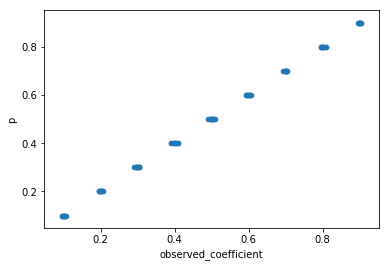

In [15]:
df.plot('observed_coefficient','p',kind='scatter')

# (Q3) Configuration Model

**(a)** Generate randomised version of different empirical networks and verify that the number of self-
loops and multiple edges becomes negligible when the system is sufficiently large.

In [16]:
def sample_multi_graph(sizes):
    df = pd.DataFrame({}, columns= ['n','self_loops','multi_edges'])
    for n in sizes:
        degrees = np.random.randint(1,n,n)
        while sum(degrees)%2!=0:
            degrees = np.random.randint(1,10,n)
        G = nx.configuration_model(degrees)
        df = df.append({'n':n,
                        'self_loops':G.number_of_selfloops(),
                        'multi_edges':2},
                       ignore_index=True)
    return df

In [17]:
df = sample_multi_graph([int(x) for x in np.linspace(100,3000,30)])
df.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
n,100,200,300,400,500,600,700,800,900,1000,...,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000
self_loops,44,64,2,135,2,211,227,2,3,2,...,1,748,729,2,863,1,2,890,1003,995
multi_edges,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


**(b)** Take an undirected network and its randomised version according to the configuration model.  Compare
the correlations between node degree and PageRank for each network.  Describe and comment the results.

Number of nodes: 34


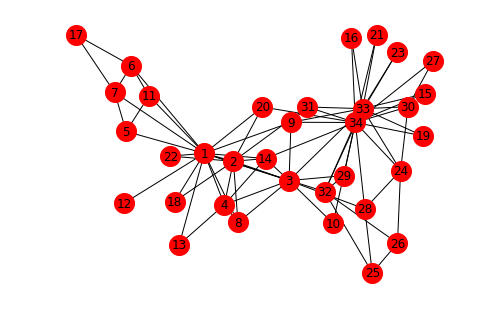

In [18]:
G = load_graph_from_tsv('karateclub.tsv')
draw(G)

Getting the vertex degrees:

Number of nodes: 34


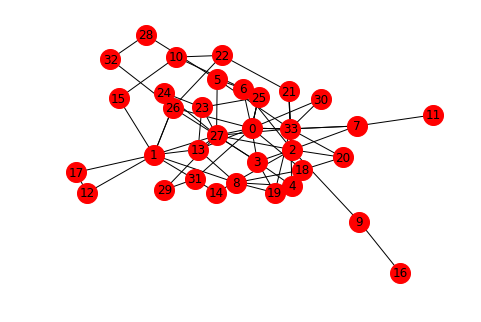

In [19]:
degrees = list(G.degree())
degrees = [x[1] for x in degrees] # Discards the node identifier
H = nx.configuration_model(degrees) # Generates a random graph with the given vertices
draw(H)

In [20]:
def generate_correlation_metrics(G):
    degree = dict(nx.degree(G))
    pagerank = nx.pagerank_numpy(G,alpha=0.5) # The $ \alpha=.85 $ was chosen randomly. Is there a better approach?

    # Builds a dataframe with the measures as columns and the nodes as rows
    df = pd.DataFrame({'degree':degree,
                       'pagerank':pagerank})
    for metric in ['pearson', 'kendall', 'spearman']:
        correlation = df.corr(metric)['degree']['pagerank']
        print(str(metric.capitalize()) + ' correlation:' + str(correlation))

In [21]:
generate_correlation_metrics(G)

Pearson correlation:0.98977936314
Kendall correlation:0.855724852457
Spearman correlation:0.947141350696


In [22]:
generate_correlation_metrics(H)

Pearson correlation:0.973238581827
Kendall correlation:0.770935922773
Spearman correlation:0.8919716435


From the above we can tell that the correlation decreases when going from the original graph to a configuration model generated graph. I assume this occurs because the configuration model is missing some relevant netwrok dynamics assumptions (for instance, if A connected to B and B to C, than A is more likely to be connected to C than average)